<a href="https://colab.research.google.com/github/vinigoia/MODELO-PARA-PREVISAO-DE-DEMANDA-TIME-SERIES-E-PROPHET/blob/main/MODELO_PARA_PREVIS%C3%83O_DE_DEMANDA_TIME_SERIES_E_PROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODELO PARA PREVISÃO DE DEMANDA - PROPHET**

_______________________________________________________________________________

## ***Se você está com pressa!!!***
________________________________________________________________________________


O principal objetivo deste estudo é realizar a previsão de demanda para um negócio relacionado à vinhos e utilizar a ferramenta Prophet para o gerenciamento de alguns dados. Conceitos relacionados à séries estacionárias e não estacionárias serão abordados, bem como análises exploratórias para geração de insights.

## ***Contextualizando...***

_______________________________________________________________________________

Prever demanda é basicamente tudo que um negócio necessita para se manter ativo e competitivo no mercado. Com as previsões, consegue-se especular o quanto de venda pode-se atingir em determinado período de tempo, o que gera informações para estocagem, fornecedores, clientes, futuros investimentos e custos.

Em nosso caso, quando falamos de vinho, podemos abordar duas situações: negócios que trabalham com a compra e revenda de vinhos e negócios que trabalham com a produção e venda do vinho. Para termos uma noção maior do processo, vamos analisar o segundo caso.

Produzir vinho requer uma extrema organização com relação as demandas e tempo. Isso porque estamos lidando com uma planta que gera um fruto e tem seu tempo de amadurecimento para coleta. Não iremos entrar aqui no detalhamento do processo de produção de vinho, mas é importante saber que é baseado na fermentação do açucar natural da uva para geração de álcool, ou seja, também tem o seu tempo de processo. 

_______________________________________________________________________________

<p align=center>
<img src="https://img.freepik.com/fotos-gratis/fazenda-colheita-da-uva_1150-6805.jpg?w=1380&t=st=1677585751~exp=1677586351~hmac=27e56da940e3c866ccc9340bc8a6945800ba209bffaa7ff727cd9f5a6c89b24c" width="60%"></p>

_______________________________________________________________________________

O vinho, em seu estado final, é um produto de sensibilidade considerável, onde deve-se ter cuidados com temperatura, exposição ao sol, umidade e local de armazenamento. Dependendo da abordagem, pode-se usar conservantes para aumentar a durabilidade do líquido.

Ao final, o vinho torna-se uma bebida alcoólica que pode ser harmonizada com diversos tipos de alimentos ou apenas apreciada. O número de apreciadores de vinhos no Brasil cresceu de 22 milhões em 2010 para 39 milhões em 2020, segundo dados da Wine Inteligence. Ou seja, um mercado em expansão.

Sabendo tudo isso, qual seria o valor da informação de quantos produtos você poderia vender no próximo mês? Ou nos 6 meses seguintes?

Quando eu deveria fecundar as videiras para que a fruta amadureça no momento certo? Qual vinho irá vender mais para que eu possa negociar com o meu fornecedor? Qual produto deve possuir um espaço menor no estoque? Como criar promoções para produtos que vendem menos?

Diversas perguntas podem ser respondidas através da previsão de demandas de produtos e é isso que veremos a seguir.

## ***Sobre os Dados***
______________________________________________________________________________

<p align=center>
<img src="https://img.freepik.com/fotos-gratis/vinho-tinto_144627-33208.jpg?w=1380&t=st=1677528908~exp=1677529508~hmac=8837ff9918f8f53166db35c4a87a1d0a34e3f54ecd104b7cf2fd14d3cdf31a5c" width="60%"></p>

______________________________________________________________________________

As informações disponibilizadas nos datasets utilizados nesse estudo são sintéticas, ou seja, foram criadas para representar da maneira mais fiel o que acontece na realidade, porém, alguns pontos devem ser observados:

* A carta de vinhos, os produtos, são reais, baseados na oferta real de um e-commerce de vinhos aqui no Brasil. Nomes, safras, e valores são 100% reais, convertidos pra Dólar para ter um apelo mais internacional;

* O conjunto de dados de venda é baseado em uma competição no Kaggle. Lá, tínha-se 5 anos de vendas diárias, distribuídas por 10 lojas, com catálogo de 50 produtos. Alterou-se esse conjunto, e agora tem-se 3 anos de vendas diárias, distribuídos por 3 lojas com 219 produtos diferentes em estoque.

Como os dados são 100% sintéticos, ou seja, foram fabricados a partir de outro conjunto, tendo sido para a maioria dos itens 100% forjados, isso vai trazer alguns pontos para o projeto, como:

* Podem não trazer o que realmente acontece na realidade com os produtos, como, por exemplo, considerar que o vinho do tipo rosé é o mais vendido. 

* Podem prejudicar a sazonalidade e intereferir com a previsibilidade dos dados, por terem sido preenchidos de forma não orgânica.

Outro ponto importante é que alguns dos vinhos no nosso conjunto de dados podem ter registro de vendas antes do seu lançamento. Por exemplo, em Janeiro de 2018 termos registro de vendas de um vinho 2019. Isso acontece, mais uma vez, devido ao nosso conjunto sintético.

Mais um detalhe que na realidade pode fazer parte de um projeto como esse, é a descontinuidade de um produto. A safra 2015 uma hora vai acabar, e não podemos prever 10 anos de venda de um produto limitado, o que acrescenta mais um desafio nesse projeto. Esse detalhe não será um problema para nós que vamos tentar prever um período curto, mas para um trabalho contínuo, os dados precisam ser revistos com frequência.

Trabalharemos com dois datasets: o primeiro focado nas informações dos produtos, o qual pode ser encontrado nesse [link](https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/products.csv), e o segundo focado nas vendas desses produtos, que pode ser encontrado nesse [link](https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/sales-clean.csv).




Primeiramente, importaremos as bibliotecas necessárias e, logo após, salvaremos nossos datasets em variáveis e veremos as primeiras entradas.

In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo de plotagem
sns.set_style('dark')

# Configuração da qualidade das imagens
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [ ]:
# Salvando os datasets em variáveis
df_p = pd.read_csv("https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/products.csv")
df_v = pd.read_csv("https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/sales-clean.csv")

In [ ]:
# Visualização das primeiras entradas
df_p.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.60,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,NV,rose sparkling,489.00,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.00,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.40,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,"1,548.00",267.82


In [ ]:
# Visualização das primeiras entradas
df_v.head()

,date,store,item,sales
0,2018-01-01,1,1,13
1,2018-01-02,1,1,11
2,2018-01-03,1,1,14
3,2018-01-04,1,1,13
4,2018-01-05,1,1,10


### **Dicionário de Variáveis**
______________________________________________________

Sendo assim, as variáveis disponíveis nos datasets são:

* `item_id` : Número de identificação do item;
* `name` : Nome do vinho;
* `producer` : Nome do Produtor do vinho;
* `country` : País de origem do vinho;
* `vintage` : Safra;
* `kind` : Tipo do vinho:
      Sparkling = Espumante
      Rose Sparkling = Espumante Rose
      White = Branco
      Rosé = Rosé
      Red = Tinto
* `price_brl` : Preço em reais;
* `price_usd` : Preço em dólar americano;
* `date` : Data da venda;
* `store` : Loja onde o produto foi vendido;
* `item` : Número de identificação do item;
* `sales` : Quantidade de produto vendido.

## ***Análise Exploratória***
______________________________________________________



### **O primeiro contato**
______________________________________________________

Antes de começar qualquer análise, iremos utilizar alguns métodos para verificação de informações básicas dos datasets, como valores médios, valores ausentes, e os tipos de variáveis presentes.

In [ ]:
# Informações gerais do dataset
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    219 non-null    int64 
 1   name       219 non-null    object
 2   producer   219 non-null    object
 3   country    219 non-null    object
 4   region     219 non-null    object
 5   vintage    219 non-null    object
 6   kind       219 non-null    object
 7   price_brl  219 non-null    object
 8   price_usd  219 non-null    object
dtypes: int64(1), object(8)
memory usage: 15.5+ KB


Observamos aqui um dataset com 219 entradas e 9 colunas, sem valores ausentes. Na visualização das primeiras entradas, percebe-se que nas colunas há alguns valores separadas por vírgula. Iremos remover essas vírgulas e transformar as variáveis dessas colunas de preços em dados numéricos.

In [ ]:
# Retirada das vírgulas do dataset
df_p.replace(',','', regex=True, inplace=True)

# Transformação de coluna string em numérica
df_p.price_brl = pd.to_numeric(df_p.price_brl)

# Transformação de coluna string em numérica
df_p.price_usd = pd.to_numeric(df_p.price_usd)

In [ ]:
# Informações gerais do dataset
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    219 non-null    int64  
 1   name       219 non-null    object 
 2   producer   219 non-null    object 
 3   country    219 non-null    object 
 4   region     219 non-null    object 
 5   vintage    219 non-null    object 
 6   kind       219 non-null    object 
 7   price_brl  219 non-null    float64
 8   price_usd  219 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 15.5+ KB


In [ ]:
# Informações gerais do dataset
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720071 entries, 0 to 720070
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    720071 non-null  object
 1   store   720071 non-null  int64 
 2   item    720071 non-null  int64 
 3   sales   720071 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 22.0+ MB


Observamos aqui um dataset com 720071 entradas e 4 colunas, sem valores ausentes. Como os dois datasets são complementares, iremos uní-los para facilitar nossa análise exploratória. Desta maneira, iremos renomear a coluna 'item', converter a coluna date para datetime e unir os datasets pela coluna 'item_id'.

In [ ]:
# Renomeação de coluna
df_v.rename(columns={'item':'item_id'},inplace=True)

# Conversão de coluna em datetime
df_v.date = pd.to_datetime(df_v.date)

# União de datasets
df = df_p.merge(df_v, on='item_id', how='right')

In [ ]:
# Visualização das primeiras entradas do novo dataset
df.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,date,store,sales
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,2018-01-01,1,13
1,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,2018-01-02,1,11
2,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,2018-01-03,1,14
3,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,2018-01-04,1,13
4,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,2018-01-05,1,10


Com os datasets unidos, podemos criar algumas features para nos auxiliar nas análises. Iremos, a princípio, verificar o valor total de vendas através da multiplicação da coluna 'price_usd' e 'sales', tranformar a coluna 'date' em nosso index e decompor nossas datas em dia, dia da semana, mês, trimeste e ano.

In [ ]:
# Criação de novaz coluna através da multiplicação
df['total_sales'] = df['price_usd'] * df['sales']

In [ ]:
# Tranformar a coluna 'date' em index
df.set_index(df.date, inplace=True)

In [ ]:
# Decomposição da data em outras features
df['day'] = df.index.day
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['year'] = df.index.year

In [ ]:
# Visualização das primeiras entradas do dataset
df.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,date,store,sales,total_sales,day,weekday,month,quarter,year
date,,,,,,,,,,,,,,,,,,
2018-01-01,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,2018-01-01,1,13,763.75,1,0,1,1,2018
2018-01-02,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,2018-01-02,1,11,646.25,2,1,1,1,2018
2018-01-03,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,2018-01-03,1,14,822.50,3,2,1,1,2018
2018-01-04,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,2018-01-04,1,13,763.75,4,3,1,1,2018
2018-01-05,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.6,58.75,2018-01-05,1,10,587.50,5,4,1,1,2018


Para não gerar certa hierarquia, iremos transformar nossa coluna 'item_id" em string.

In [ ]:
# Transformação de coluna em string
df.item_id = df.item_id.astype(str)

Agora iremos realizar algumas plotagens e verificar os insights que os gráficos podem nos dar.

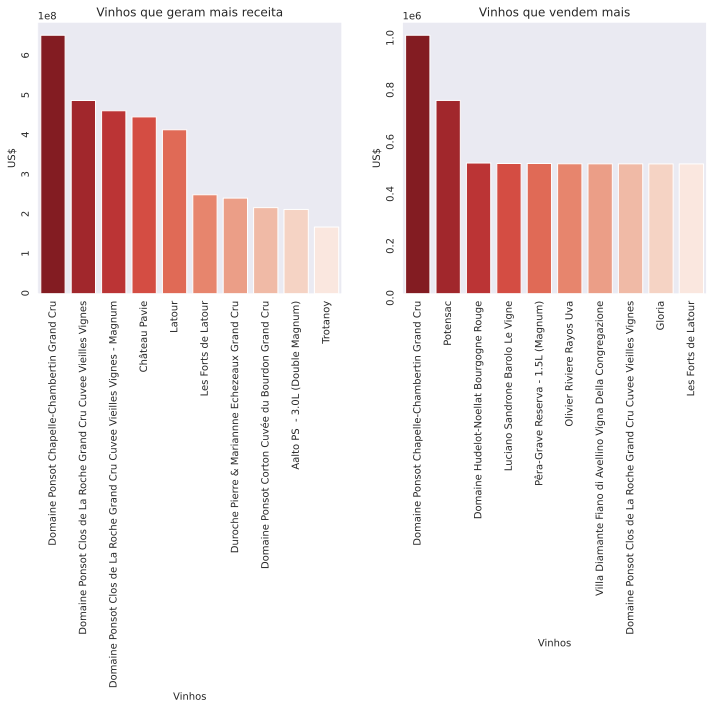

In [ ]:
# Configuração do plano de plotagem
fig, ax = plt.subplots(figsize=(12,5), ncols=2, nrows=1)

# Plotagem gráfico
best_sales = df.groupby(df.name)['total_sales'].sum().sort_values(ascending=False)[0:10]
sns.barplot(x=best_sales.index, y=best_sales.values, palette="Reds_r", ax=ax[0])
ax[0].tick_params(labelrotation=90)
ax[0].set_xlabel('Vinhos')
ax[0].set_ylabel('US$')
ax[0].set_title('Vinhos que geram mais receita')

# Plotagem gráfico
best_wines = df.groupby(df.name)['sales'].sum().sort_values(ascending=False)[0:10]
sns.barplot(x=best_wines.index, y=best_wines.values, palette="Reds_r", ax=ax[1])
ax[1].tick_params(labelrotation=90)
ax[1].set_xlabel('Vinhos')
ax[1].set_ylabel('US$')
ax[1].set_title('Vinhos que vendem mais')

plt.show()

Podemos verificar que o vinho que gera mais receita também é o vinho que vende mais. Nessas circunstâncias, manter um estoque considerável e um bom relacionamento com o fornecedor é de extrema importância. 

Quando observamos os outros vinhos, temos que ter cuidado com as conclusões. Por exemplo, o segundo vinho que mais gera receita nem aparece na lista dos 10 vinhos que vendem mais. O mesmo acontece para o terceiro, quarto e quinto.

Vamos anlisar os preços desses vinhos.

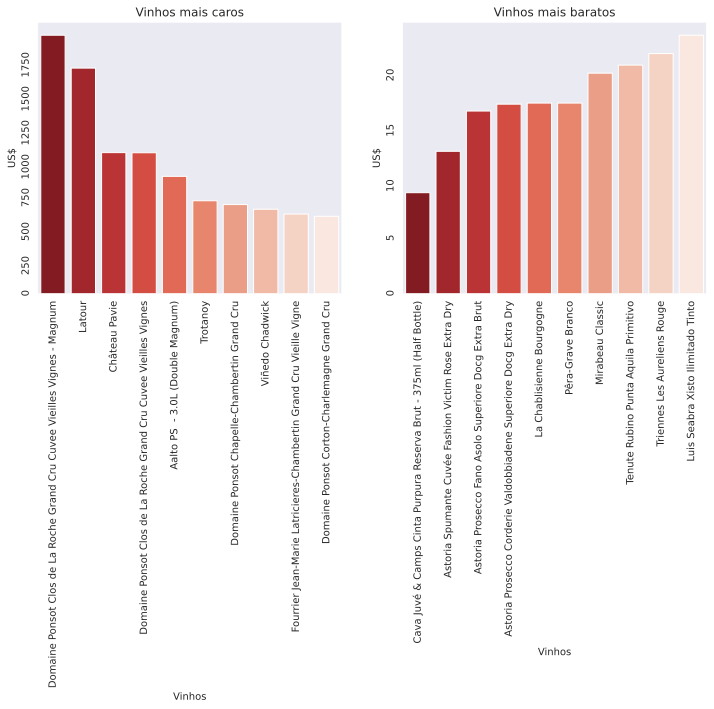

In [ ]:
# Configuração do plano de plotagem
fig, ax = plt.subplots(figsize=(12,5), ncols=2, nrows=1)

# Plotagem gráfico
exp_wines = df.groupby(df.name)['price_usd'].max().sort_values(ascending=False)[0:10]
sns.barplot(x=exp_wines.index, y=exp_wines.values, palette="Reds_r", ax=ax[0])
ax[0].tick_params(labelrotation=90)
ax[0].set_xlabel('Vinhos')
ax[0].set_ylabel('US$')
ax[0].set_title('Vinhos mais caros')

# Plotagem gráfico
cheap_wines = df.groupby(df.name)['price_usd'].max().sort_values(ascending=True)[0:10]
sns.barplot(x=cheap_wines.index, y=cheap_wines.values, palette="Reds_r", ax=ax[1])
ax[1].tick_params(labelrotation=90)
ax[1].set_xlabel('Vinhos')
ax[1].set_ylabel('US$')
ax[1].set_title('Vinhos mais baratos')

plt.show()

Observa-se que a maioria dos vinhos que mais geram receita também são os mais caros. E o vinho que mais vende possui também um preço relativamente alto. Podemos concluir que os clientes dessas lojas possuem um perfil mais refinado de consumo, supostamente de classe social alta. 

O gráfico abaixo demonstra que os vinhos mais baratos geram as menores receitas, comprovando a afirmação acima.

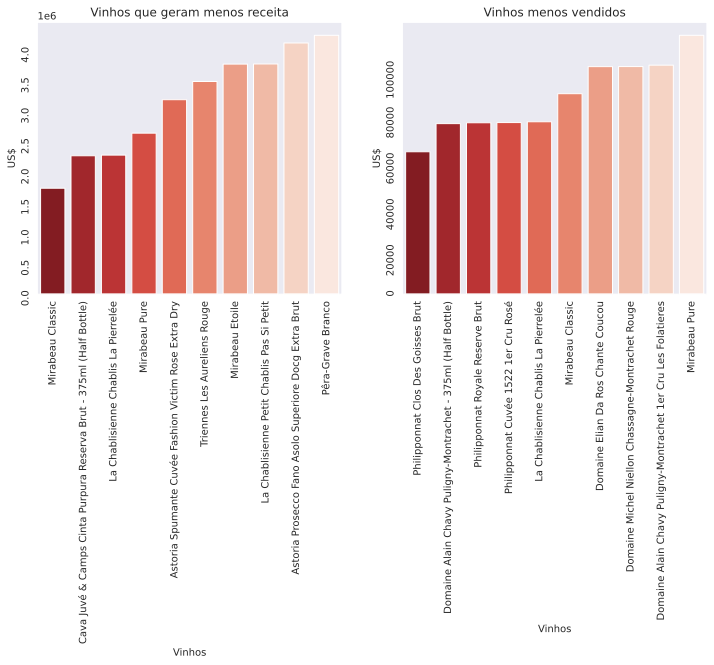

In [ ]:
# Configuração do plano de plotagem
fig, ax = plt.subplots(figsize=(12,5), ncols=2, nrows=1)

# Plotagem gráfico
worst_sales = df.groupby(df.name)['total_sales'].sum().sort_values(ascending=True)[0:10]
sns.barplot(x=worst_sales.index, y=worst_sales.values, palette="Reds_r", ax=ax[0])
ax[0].tick_params(labelrotation=90)
ax[0].set_xlabel('Vinhos')
ax[0].set_ylabel('US$')
ax[0].set_title('Vinhos que geram menos receita')

# Plotagem gráfico
worst_wines = df.groupby(df.name)['sales'].sum().sort_values(ascending=True)[0:10]
sns.barplot(x=worst_wines.index, y=worst_wines.values, palette="Reds_r", ax=ax[1])
ax[1].tick_params(labelrotation=90)
ax[1].set_xlabel('Vinhos')
ax[1].set_ylabel('US$')
ax[1].set_title('Vinhos menos vendidos')

plt.show()

O gráfico abaixo mostra claramente que um produtor lidera quase que isoladamente o ranking de vendas. Seria isso uma situação ideal? Se acontecer qualquer problema com as plantações ou processo do fornecedor, seu faturamento estará completamente comprometido. O ideal seria tentar equilibrar as vendas por produtores para que, no caso de qualquer imprevisto, a situação se mantenha estável. Uma alternativa seria a criação de promoções onde garrafas de outros produtores seriam vendidas juntamente com as garrafas do produtor principal, acostumando o paladar dos clientes às outras alternativas.

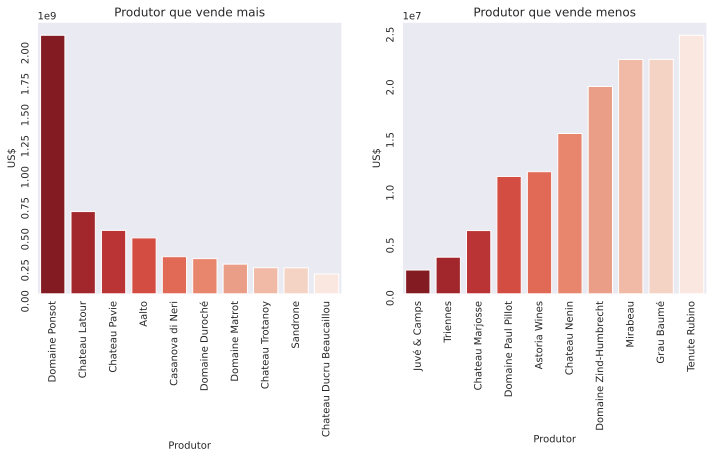

In [ ]:
# Configuração do plano de plotagem
fig, ax = plt.subplots(figsize=(12,5), ncols=2, nrows=1)

# Plotagem gráfico
best_prod = df.groupby(df.producer)['total_sales'].sum().sort_values(ascending=False)[0:10]
sns.barplot(x=best_prod.index, y=best_prod.values, palette="Reds_r", ax=ax[0])
ax[0].tick_params(labelrotation=90)
ax[0].set_xlabel('Produtor')
ax[0].set_ylabel('US$')
ax[0].set_title('Produtor que vende mais')

# Plotagem gráfico
worst_prod = df.groupby(df.producer)['total_sales'].sum().sort_values(ascending=True)[0:10]
sns.barplot(x=worst_prod.index, y=worst_prod.values, palette="Reds_r", ax=ax[1])
ax[1].tick_params(labelrotation=90)
ax[1].set_xlabel('Produtor')
ax[1].set_ylabel('US$')
ax[1].set_title('Produtor que vende menos')

plt.show()

O gráfico abaixo nos mostra que há um equilibrio de vendas entre as 3 lojas disponíveis.

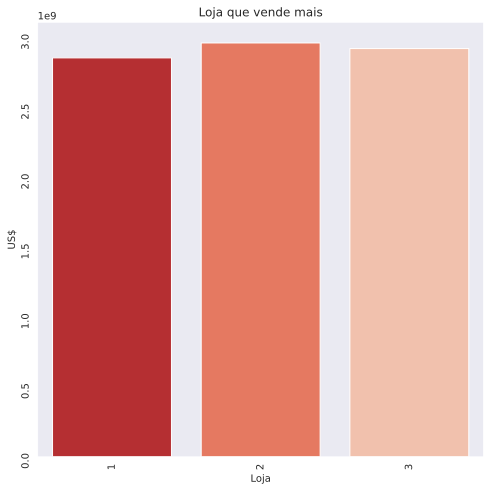

In [ ]:
# Configuração do plano de plotagem
fig, ax = plt.subplots(figsize=(8,8))

# Plotagem gráfico
best_store = df.groupby(df.store)['total_sales'].sum().sort_values(ascending=False)[0:10]
sns.barplot(x=best_store.index, y=best_store.values, palette="Reds_r", ax=ax)
ax.tick_params(labelrotation=90)
ax.set_xlabel('Loja')
ax.set_ylabel('US$')
ax.set_title('Loja que vende mais')

plt.show()

Vamos verificar agora se as vendas são maiores durante a semana ou durante o final de semana. Para isso, criaremos uma nova coluna para identificação dos sábados e domingos e depois plotaremos as informações.

In [ ]:
# Criação de nova coluna para identificação de finais de semana
df['weekend'] = 0
df.loc[(df['weekday']== 5) | (df['weekday']== 6), 'weekend'] = 1

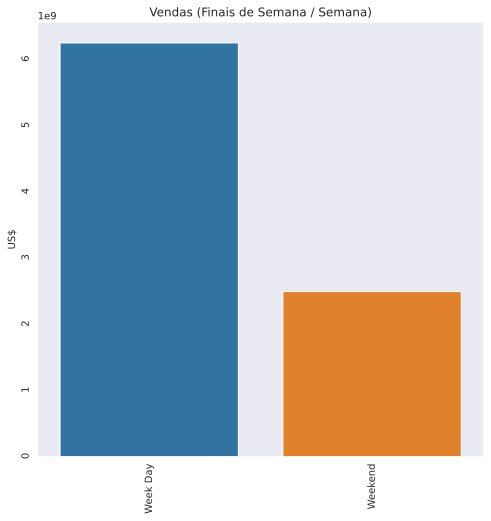

In [ ]:
# Configuração do plano de plotagem
fig, ax = plt.subplots(figsize=(8,8))

# Plotagem gráfico
fds_sales = df.groupby(df.weekend)['total_sales'].sum().sort_values(ascending=False)[0:10]
sns.barplot(x=fds_sales.index, y=fds_sales.values, ax=ax)
ax.tick_params(labelrotation=90)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Weekend'
labels[0] = 'Week Day'
ax.set_xticklabels(labels)
ax.set_ylabel('US$')
ax.set_xlabel('')
ax.set_title('Vendas (Finais de Semana / Semana)')

plt.show()

Observa-se claramente que as maiores vendas acontecem durante a semana. Podemos levantar a hipótese de que isso acontece devido ao padrão de vida dos consumidores de classe social alta, onde se tem uma maior flexibilização de horários com relação ao trabalho.

Verificaremos agora se há alguma correlação entre o número de vendas e as demais colunas numéricas.

In [ ]:
# Criação da matriz correlação
corr_matrix=df.corr()

# Visualização
corr_matrix['sales'].sort_values(ascending=False)

sales          1.000000
total_sales    0.348264
price_brl      0.031758
price_usd      0.031758
store          0.024190
year           0.022450
weekday        0.016227
quarter        0.014924
month          0.013768
weekend        0.009871
day            0.001349
Name: sales, dtype: float64

Desconsiderando a coluna 'total_sales', observa-se uma baixa correlação entre as features.

## ***Preparando o Terreno***
________________________________________________________________________________

Neste momento iremos preparar nosso dataset para o uso do Prophet. Prophet é uma ferramenta para *Forecasting* de *Time Series*. Ou seja, ela nos auxilia na previsão de valores em datasets onde o tempo tem certo protagonismo. Para a aplicação da ferramenta, temos que nos atentar à duas coisas: a primeira é que o Prophet apenas aceita datasets onde há uma coluna de nome 'ds' com as datas dos eventos e uma coluna com o nome 'y' com os valores; e a segunda é que temos que confirmar se a nossa time series é estacionária. 

De maneira simplificada, ser estacionária significa ter a **média, variância e covariância** permanecendo **constante** ao longo da dimensão temporal. Nesta projeto realizaremos um teste estatístico específico para identificar se nossa TS é estacionária ou não, o teste ***Augmented Dickey Fuller (ADF)***

Antes de mais nada, vamos selecionar os dados que precisamos.

In [ ]:
# Renomeação de coluna
df.rename(columns={'date':'Date'}, inplace=True)

# Seleção dos dados
df_ts=df.groupby('Date',as_index=False)['sales'].sum()
df_ts['Date'] = pd.to_datetime(df_ts['Date'], format="%Y-%m-%d")
df_ts.index = pd.to_datetime(df_ts['Date'], format="%Y-%m-%d")
df_ts.drop('Date', axis=1, inplace=True)

# Exclusão de outlier
df_ts=df_ts.iloc[1:,:]

# Visualização das primeiras entradas do dataset
df_ts.head()

,sales
Date,
2018-01-01,43432
2018-01-02,43181
2018-01-03,43298
2018-01-04,42216
2018-01-05,42001


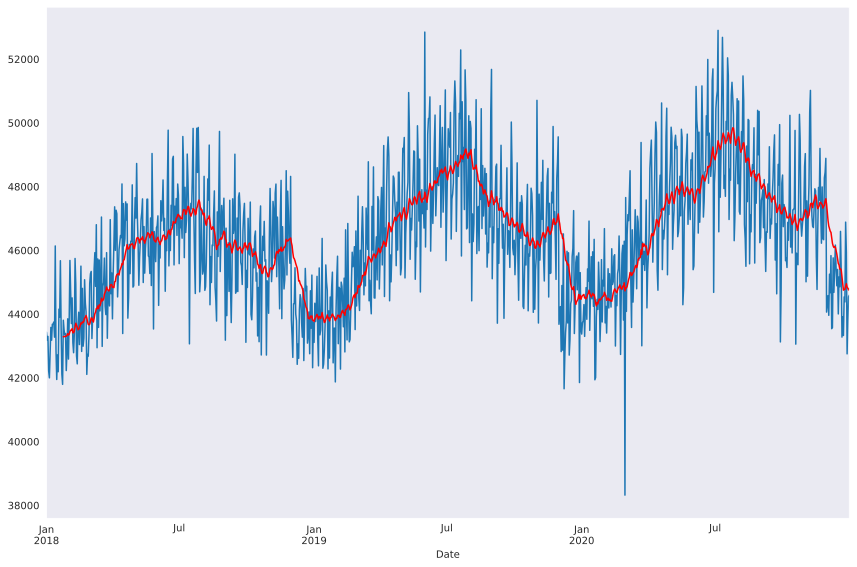

In [ ]:
# Ver o plot original
ma = df_ts.rolling(24).mean()

fig, ax = plt.subplots(figsize=(12,8))
df_ts.plot(ax=ax, legend=False)
ma.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

Agora, deixaremos o dataset no padrão Prophet.

In [ ]:
# Nomeando corretamente
df_ts_n= df_ts
df_ts_n = df_ts_n.reset_index()
df_ts_n.columns = ['ds', 'y']
df_ts_n = df_ts_n.reset_index()
df_ts_n.drop('index', axis=1, inplace=True)
df_ts_n.head()

,ds,y
0,2018-01-01,43432
1,2018-01-02,43181
2,2018-01-03,43298
3,2018-01-04,42216
4,2018-01-05,42001


Com o dataset pronto, iremos realizar o teste ADF. Para a série ser considerada estacionária, o P Value tem que menor ou igual a 5%. Vamos verificar.

In [ ]:
# importanto o pacote
from statsmodels.tsa.stattools import adfuller

# extraindo os valores
X = df_ts_n.y

# aplicando o ADF e imprimindo os resultados.
result = adfuller(X)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result[0]))
print('P Value: {:.10f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey–Fuller
Statistical Test: -2.3601
P Value: 0.1533303754
Critical Values:
	1%: -3.4365
	5%: -2.8642
	10%: -2.5682


Temos um P Value de 15,33%, ou seja, tem uma chance de em torno de 85% da nossa time series ser estacionária. Mesmo assim, iremos utilizar o Prophet nela.

## ***Utilizando o Prophet***
________________________________________________________________________________

Iremos instalar os pacotes necessários e realizar os procedimentos para o correto uso da ferramenta.

In [ ]:
!pip install prophet;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
# Definindo o tamanho da previsão para trinta dias
prediction_size = 30
train_df = df_ts_n[:-prediction_size]

In [ ]:
# Instanciar e treinar o modelo
model = Prophet()

model.fit(train_df)

# Determinar o período de dias para previsão
future = model.make_future_dataframe(periods=prediction_size)

# Realizar a previsão para o período estabelecido
forecast = model.predict(future)

# Visualização das primeiras entradas
forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83x1et6z/j9frc8du.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp83x1et6z/v6lrx3dc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93503', 'data', 'file=/tmp/tmp83x1et6z/j9frc8du.json', 'init=/tmp/tmp83x1et6z/v6lrx3dc.json', 'output', 'file=/tmp/tmp83x1et6z/prophet_model42jvf6ov/prophet_model-20230228164949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:49:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:49:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,45496.182525,40788.146972,44036.252816,45496.182525,45496.182525,-3082.342922,-3082.342922,-3082.342922,-899.877094,-899.877094,-899.877094,-2182.465828,-2182.465828,-2182.465828,0.0,0.0,0.0,42413.839603
1,2018-01-02,45495.235860,41260.456704,44212.736004,45495.235860,45495.235860,-2799.525288,-2799.525288,-2799.525288,-616.625356,-616.625356,-616.625356,-2182.899932,-2182.899932,-2182.899932,0.0,0.0,0.0,42695.710572
2,2018-01-03,45494.289196,41435.129999,44536.247398,45494.289196,45494.289196,-2460.241524,-2460.241524,-2460.241524,-275.724621,-275.724621,-275.724621,-2184.516903,-2184.516903,-2184.516903,0.0,0.0,0.0,43034.047672
3,2018-01-04,45493.342531,41848.555912,45156.272814,45493.342531,45493.342531,-1980.894304,-1980.894304,-1980.894304,206.230845,206.230845,206.230845,-2187.125149,-2187.125149,-2187.125149,0.0,0.0,0.0,43512.448227
4,2018-01-05,45492.395866,42651.223925,45689.133469,45492.395866,45492.395866,-1339.452172,-1339.452172,-1339.452172,851.050820,851.050820,851.050820,-2190.502992,-2190.502992,-2190.502992,0.0,0.0,0.0,44152.943695


Se visualizarmos as últimas 30 linhas, estas serão as previsões do framework.

In [ ]:
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1066,2020-12-02,47422.428896,44310.207415,47364.158078,47422.428896,47422.428896,-1628.209241,-1628.209241,-1628.209241,-275.724621,-275.724621,-275.724621,-1352.484620,-1352.484620,-1352.484620,0.0,0.0,0.0,45794.219655
1067,2020-12-03,47424.875222,44614.186994,47726.142851,47424.875222,47424.875222,-1264.598592,-1264.598592,-1264.598592,206.230845,206.230845,206.230845,-1470.829438,-1470.829438,-1470.829438,0.0,0.0,0.0,46160.276629
1068,2020-12-04,47427.321548,45118.912760,48306.522478,47427.321548,47427.321548,-731.080167,-731.080167,-731.080167,851.050820,851.050820,851.050820,-1582.130987,-1582.130987,-1582.130987,0.0,0.0,0.0,46696.241381
1069,2020-12-05,47429.767874,45675.608636,48881.447800,47429.767874,47429.767874,-267.957403,-267.957403,-267.957403,1417.666135,1417.666135,1417.666135,-1685.623538,-1685.623538,-1685.623538,0.0,0.0,0.0,47161.810471
1070,2020-12-06,47432.214200,43486.118247,46489.495420,47432.214200,47432.214200,-2463.427554,-2463.427554,-2463.427554,-682.720730,-682.720730,-682.720730,-1780.706824,-1780.706824,-1780.706824,0.0,0.0,0.0,44968.786646
1071,2020-12-07,47434.660527,43062.796572,46394.368524,47434.660527,47434.660527,-2766.827022,-2766.827022,-2766.827022,-899.877094,-899.877094,-899.877094,-1866.949928,-1866.949928,-1866.949928,0.0,0.0,0.0,44667.833505
1072,2020-12-08,47437.106853,43362.416142,46350.740172,47437.106853,47437.106853,-2560.716754,-2560.716754,-2560.716754,-616.625356,-616.625356,-616.625356,-1944.091398,-1944.091398,-1944.091398,0.0,0.0,0.0,44876.390099
1073,2020-12-09,47439.553179,43662.251406,46734.337487,47439.553179,47439.553179,-2287.760316,-2287.760316,-2287.760316,-275.724621,-275.724621,-275.724621,-2012.035696,-2012.035696,-2012.035696,0.0,0.0,0.0,45151.792863
1074,2020-12-10,47441.999505,44110.967262,47134.461508,47441.999505,47442.064262,-1864.615368,-1864.615368,-1864.615368,206.230845,206.230845,206.230845,-2070.846213,-2070.846213,-2070.846213,0.0,0.0,0.0,45577.384137
1075,2020-12-11,47444.445831,44566.333112,47654.078001,47444.445831,47444.666649,-1269.684302,-1269.684302,-1269.684302,851.050820,851.050820,851.050820,-2120.735122,-2120.735122,-2120.735122,0.0,0.0,0.0,46174.761529


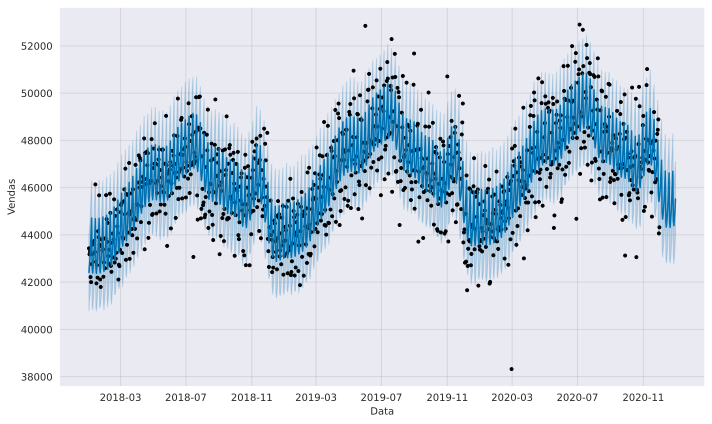

In [ ]:
# Visualizar o gráfico com as previsões
model.plot(forecast, xlabel='Data', ylabel='Vendas');

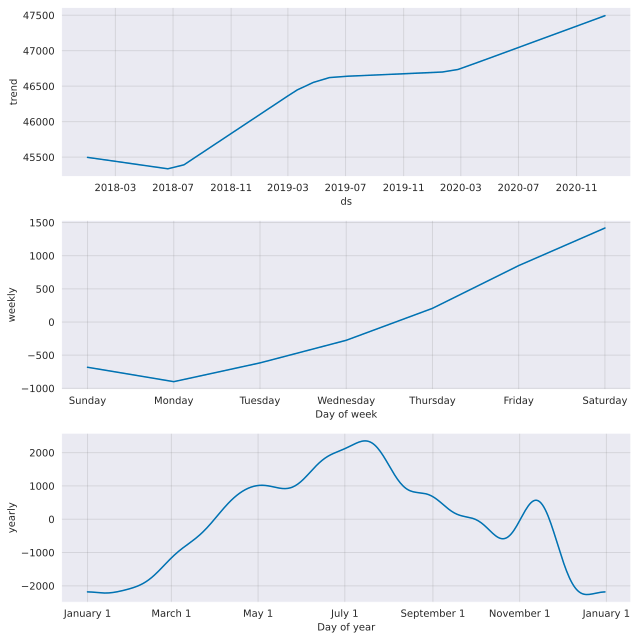

In [ ]:
# Separar os componentes do modelo
model.plot_components(forecast);

Não basta apenas realizar as previsões, temos que verificar se as mesmas estão corretas. Para isso, iremos utilizar as métricas MAE e MAPE como parâmetro.

In [ ]:
# Definindo a função
def make_comparison_dataframe(historical, forecast):
  return forecast.set_index('ds')[['yhat', 'yhat_lower',
                                'yhat_upper']].join(historical.set_index('ds'))
cmp_df = make_comparison_dataframe(df_ts_n, forecast)

def calculate_forecast_errors(df_ts, prediction_size):

  df = df_ts.copy()
  df['e'] = df['y'] - df['yhat']
  df['p'] = 100 * df['e'] / df['y']
  predicted_part = df[-prediction_size:]

  error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

  return{'MAPE': error_mean('p'), 'MAE': error_mean('e')}

# Imprimindo o MAPE e MAE
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
  print(err_name, err_value)

MAPE 2.267839782119817
MAE 1008.515005674517


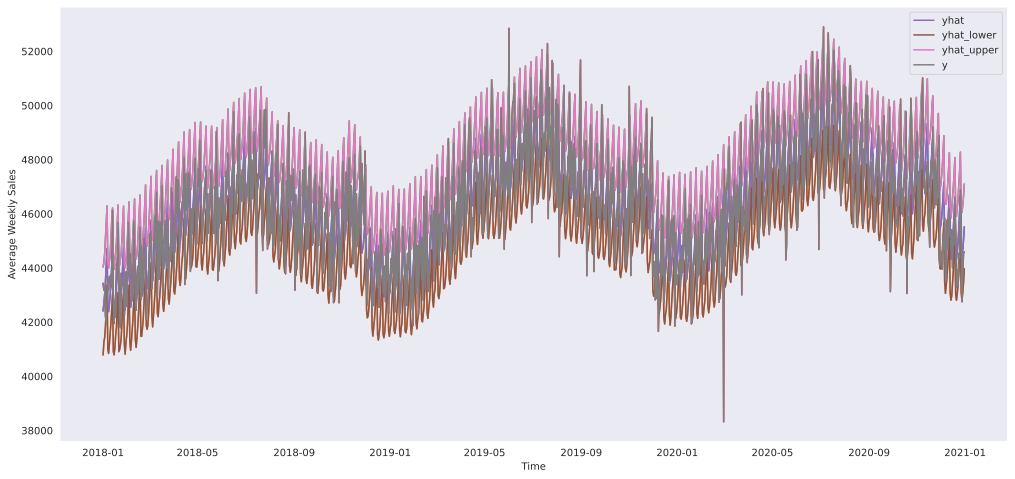

In [ ]:
# Visualizando os resultados
fig, ax = plt.subplots(figsize=(17,8))

plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])

plt.xlabel('Time')
plt.ylabel('Average Weekly Sales')
ax.plot(cmp_df['yhat'], label='yhat')
ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
ax.plot(cmp_df['y'], label='y')
ax.legend()
#plt.savefig('non_st_yhat.png')
plt.show()

As nossas métricas indicam que as previsões não estão tão confiantes assim. Para melhorar essa situação, iremos transformar nossa time series em estacionária. Para isso, aplicaremos uma função logaritmica que tem o papel de diminuir a sazonalidade de nosso dataset.

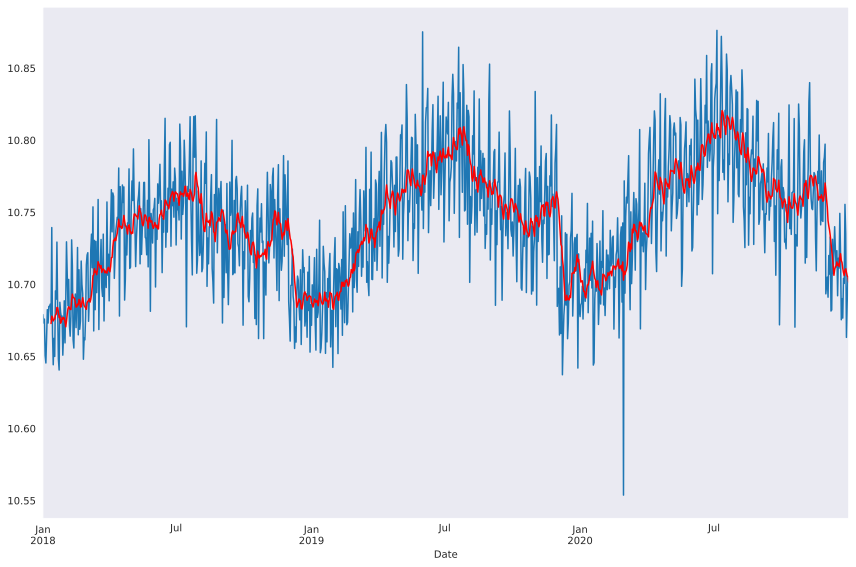

In [ ]:
# Aplicar log e plotar gráfico
df_log = np.log(df_ts)
ma_log = df_log.rolling(12).mean()

fig, ax = plt.subplots(figsize=(12,8))
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

Apesar de apresentar o mesmo comportamento, observa-se uma diminuição da escala no eixo y.

In [ ]:
# Nomeando corretamente
df_log_n= df_log
df_log_n = df_log_n.reset_index()
df_log_n.columns = ['ds', 'y']
df_log_n = df_log_n.reset_index()
df_log_n.drop('index', axis=1, inplace=True)
df_log_n.head()

,ds,y
0,2018-01-01,10.678952
1,2018-01-02,10.673156
2,2018-01-03,10.675862
3,2018-01-04,10.650555
4,2018-01-05,10.645449


In [ ]:
# Extraindo os valores
X2 = df_log_n.y

# Aplicando o ADF e imprimindo os resultados.
result2 = adfuller(X2)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result2[0]))
print('P Value: {:.10f}'.format(result2[1]))
print('Critical Values:')
for key, value in result2[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey–Fuller
Statistical Test: -2.3933
P Value: 0.1436410180
Critical Values:
	1%: -3.4365
	5%: -2.8642
	10%: -2.5682


Nosso P Value diminui, mas ainda está elevado. Vamos aplicar a técnica de subtração da média da função logaritmica e verificar os resultados.

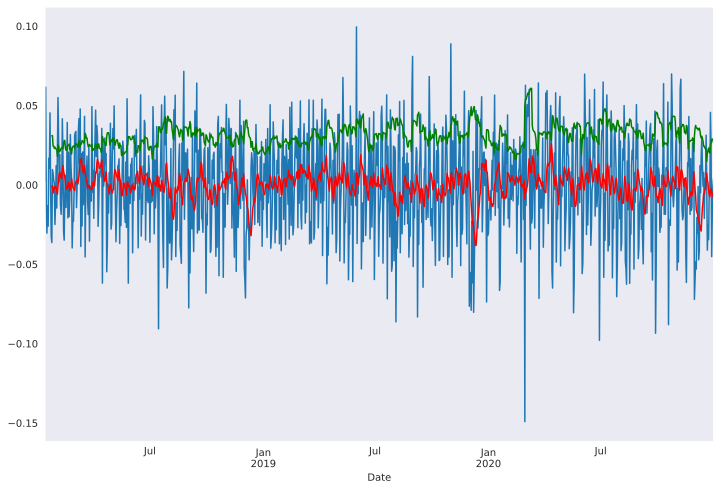

In [ ]:
# Subtrair a média do log dos dados
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(12).mean()
std_sub = df_sub.rolling(12).std()

fig, ax = plt.subplots(figsize=(12,8))
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, color='r', legend=False)
std_sub.plot(ax=ax, color='g', legend=False)
plt.show()

Aqui nosso dataset já apresenta um comportamento de série estacionária. Vamos continuar os procedimentos.

In [ ]:
# Nomeando corretamente
df_sub_n= df_sub
df_sub_n = df_sub_n.reset_index()
df_sub_n.columns = ['ds', 'y']
df_sub_n = df_sub_n.reset_index()
df_sub_n.drop('index', axis=1, inplace=True)
df_sub_n.head()

,ds,y
0,2018-01-12,0.002531
1,2018-01-13,0.061490
2,2018-01-14,-0.011565
3,2018-01-15,-0.030389
4,2018-01-16,-0.013147


In [ ]:
# Extraindo os valores
X3 = df_sub_n.y

# Aplicando o ADF e imprimindo os resultados.
result3 = adfuller(X3)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result3[0]))
print('P Value: {:.10f}'.format(result3[1]))
print('Critical Values:')
for key, value in result3[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey–Fuller
Statistical Test: -6.8574
P Value: 0.0000000016
Critical Values:
	1%: -3.4365
	5%: -2.8643
	10%: -2.5682


Aqui nosso P Value está abaixo de 5%, ou seja, podemos confirmar que nossa série é estacionária. Podemos aplicar a diferenciação para otimizar ainda mais nossos resultados.

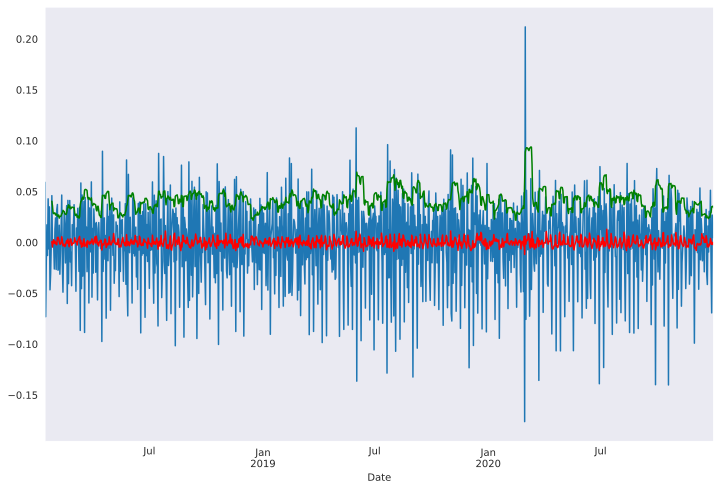

In [ ]:
# Aplicando a diferenciação
df_diff = df_sub.diff(1).dropna()
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

fig, ax = plt.subplots(figsize=(12,8))
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, color='r', legend=False)
std_diff.plot(ax=ax, color='g', legend=False)
plt.show()

In [ ]:
# Nomeando corretamente
df_diff_n= df_diff
df_diff_n = df_diff_n.reset_index()
df_diff_n.columns = ['ds', 'y']
df_diff_n = df_diff_n.reset_index()
df_diff_n.drop('index', axis=1, inplace=True)
df_diff_n.head()

,ds,y
0,2018-01-13,0.058959
1,2018-01-14,-0.073054
2,2018-01-15,-0.018825
3,2018-01-16,0.017243
4,2018-01-17,-0.012840


In [ ]:
# Extraindo os valores
X4 = df_diff_n.y.dropna().values

# Aplicando o ADF e imprimindo os resultados.
result4 = adfuller(X4)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result4[0]))
print('P Value: {:.15f}'.format(result4[1]))
print('Critical Values:')
for key, value in result4[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey–Fuller
Statistical Test: -15.5338
P Value: 0.000000000000000
Critical Values:
	1%: -3.4365
	5%: -2.8643
	10%: -2.5682


Para finalizar, iremos submeter ao Prophet nossos datasets e observar o melhor resultado.

In [ ]:
# Transformando no formato do Prophet
df_log.reset_index(inplace=True)
df_log.rename(columns={'Date':'ds', 'sales':'y'}, inplace=True)

df_sub.reset_index(inplace=True)
df_sub.rename(columns={'Date':'ds', 'sales':'y'}, inplace=True)

df_diff.reset_index(inplace=True)
df_diff.rename(columns={'Date':'ds', 'sales':'y'}, inplace=True)

In [ ]:
# Definindo o tamanho da previsão
prediction_size = 30

train_df_log = df_log[:-prediction_size]
train_df_sub = df_sub[:-prediction_size]
train_df_diff = df_diff[:-prediction_size]

In [ ]:
# Instanciar e treinar o modelo
model_log = Prophet()
model_sub = Prophet()
model_diff = Prophet()

model_log.fit(train_df_log)
model_sub.fit(train_df_sub)
model_diff.fit(train_df_diff)

# Determinar o período de dias para previsão
future_log = model_log.make_future_dataframe(periods=prediction_size)
future_sub = model_sub.make_future_dataframe(periods=prediction_size)
future_diff = model_diff.make_future_dataframe(periods=prediction_size)

# Realizar a previsão para o período estabelecido
forecast_log = model_log.predict(future_log)
forecast_sub = model_sub.predict(future_sub)
forecast_diff = model_diff.predict(future_diff)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpndbvwki1/1ew_oxp7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpndbvwki1/m03m576y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78236', 'data', 'file=/tmp/tmpndbvwki1/1ew_oxp7.json', 'init=/tmp/tmpndbvwki1/m03m576y.json', 'output', 'file=/tmp/tmpndbvwki1/prophet_modelcrxjmcaz/prophet_model-20230228173015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:30:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:30:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpndb

In [ ]:
# Definindo a função
def make_comparison_dataframe(historical, forecast):
  return forecast.set_index('ds')[['yhat', 'yhat_lower',
                                'yhat_upper']].join(historical.set_index('ds'))

cmp_df_log = make_comparison_dataframe(df_log, forecast_log)
cmp_df_sub = make_comparison_dataframe(df_sub, forecast_sub)
cmp_df_diff = make_comparison_dataframe(df_diff, forecast_diff)

def calculate_forecast_errors(df_ts, prediction_size):

  df = df_ts.copy()
  df['e'] = df['y'] - df['yhat']
  df['p'] = 100 * df['e'] / df['y']
  predicted_part = df[-prediction_size:]

  error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

  return{'MAPE': error_mean('p'), 'MAE': error_mean('e')}

# imprimindo o MAPE e MAE
print("Aplicação de Log")
for err_name, err_value in calculate_forecast_errors(cmp_df_log, prediction_size).items():
  print(err_name, err_value)

print("\nAplicação de Subtração de média")
for err_name, err_value in calculate_forecast_errors(cmp_df_sub, prediction_size).items():
  print(err_name, err_value)

print("\nAplicação de Diferenciação")
for err_name, err_value in calculate_forecast_errors(cmp_df_diff, prediction_size).items():
  print(err_name, err_value)

Aplicação de Log
MAPE 0.20132798086935053
MAE 0.021549251650755726

Aplicação de Subtração de média
MAPE 599.5262953830528
MAE 0.020167471175072227

Aplicação de Diferenciação
MAPE 133.66375433043115
MAE 0.02265394475976268


Apesar da aplicação da Subtração da Média e da Diferenciação ter melhorado nosso P Value, as métricas tiveram um comportamento incomum. Enquanto observamos um MAPE acima dos 100%, nosso MAE permanece baixo. Para dar andamento nos procedimentos, iremos utilizar apenas o modelo treinado pelo dataset que sofreu alterações pela função logaritmica, o qual apresentou resultados mais condizentes.

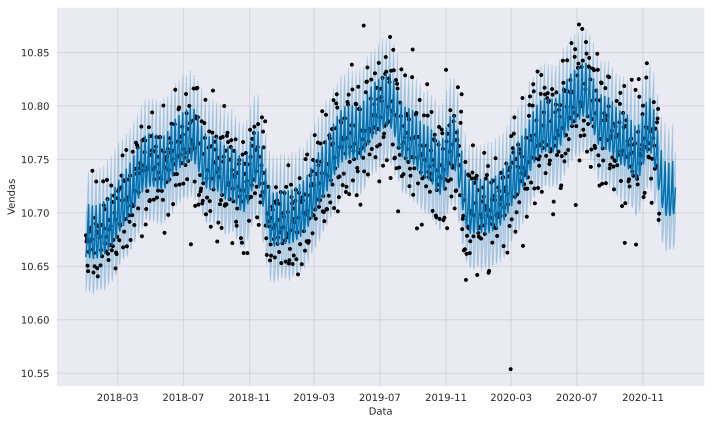

In [ ]:
# Visualizar o gráfico com as previsões
model_log.plot(forecast_log, xlabel='Data', ylabel='Vendas');

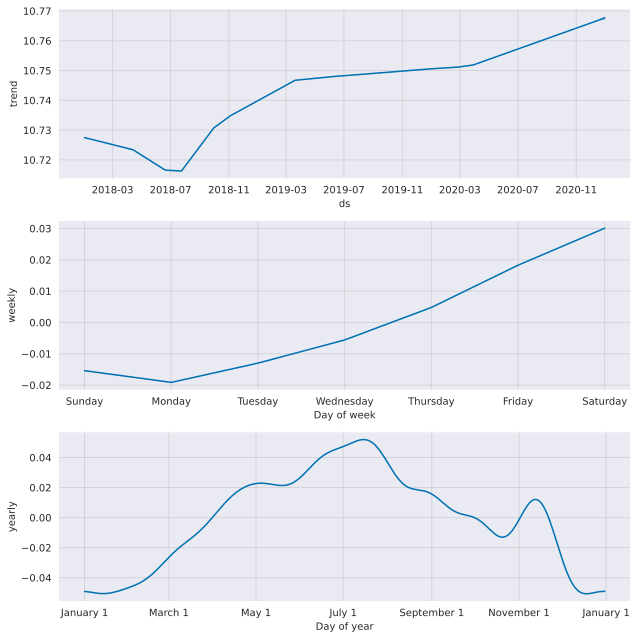

In [ ]:
# Separar os componentes do modelo
model_log.plot_components(forecast_log);

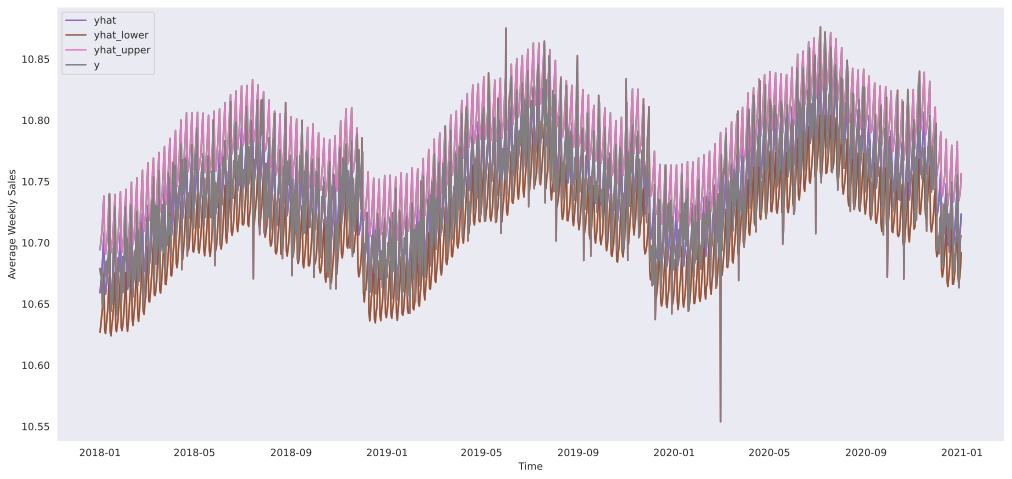

In [ ]:
# Visualizando os resultados
fig, ax = plt.subplots(figsize=(17,8))

plt.plot(cmp_df_log['yhat'])
plt.plot(cmp_df_log['yhat_lower'])
plt.plot(cmp_df_log['yhat_upper'])
plt.plot(cmp_df_log['y'])

plt.xlabel('Time')
plt.ylabel('Average Weekly Sales')
ax.plot(cmp_df_log['yhat'], label='yhat')
ax.plot(cmp_df_log['yhat_lower'], label='yhat_lower')
ax.plot(cmp_df_log['yhat_upper'], label='yhat_upper')
ax.plot(cmp_df_log['y'], label='y')
ax.legend()
#plt.savefig('non_st_yhat.png')
plt.show()

In [ ]:
# Criando um dataset completo
df_final = forecast_log[['ds', 'yhat']]
df_final.head()

,ds,yhat
0,2018-01-01,10.659221
1,2018-01-02,10.665265
2,2018-01-03,10.672533
3,2018-01-04,10.682748
4,2018-01-05,10.696054


In [ ]:
# Visualizando os valores das previsões
df_final['AmountSpentLog'] = df_log['y']
df_final.head()

<ipython-input-41-2c4e2af1da69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['AmountSpentLog'] = df_log['y']


,ds,yhat,AmountSpentLog
0,2018-01-01,10.659221,10.678952
1,2018-01-02,10.665265,10.673156
2,2018-01-03,10.672533,10.675862
3,2018-01-04,10.682748,10.650555
4,2018-01-05,10.696054,10.645449


Para que os números façam mais sentido, iremos transformá-los novamente na escala inicial do dataset, aplicando uma função exponencial.

In [ ]:
# Transformando os valores para a escala original
df_final['AmountSpent'] = np.exp(df_final['AmountSpentLog'].values)
df_final['AmountSpentPred'] = np.exp(df_final['yhat'].values)
df_final.head(10)

<ipython-input-42-373d54c5dcc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['AmountSpent'] = np.exp(df_final['AmountSpentLog'].values)
<ipython-input-42-373d54c5dcc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['AmountSpentPred'] = np.exp(df_final['yhat'].values)


,ds,yhat,AmountSpentLog,AmountSpent,AmountSpentPred
0,2018-01-01,10.659221,10.678952,43432.0,42583.456363
1,2018-01-02,10.665265,10.673156,43181.0,42841.609876
2,2018-01-03,10.672533,10.675862,43298.0,43154.096535
3,2018-01-04,10.682748,10.650555,42216.0,43597.210883
4,2018-01-05,10.696054,10.645449,42001.0,44181.167133
5,2018-01-06,10.707683,10.663522,42767.0,44697.974966
6,2018-01-07,10.661981,10.682400,43582.0,42701.133915
7,2018-01-08,10.658049,10.673179,43182.0,42533.579187
8,2018-01-09,10.664012,10.684646,43680.0,42787.967181
9,2018-01-10,10.671243,10.684783,43686.0,43098.488216


Finalmente, plotaremos os valores previstos e os valores originais para o datase estudado.

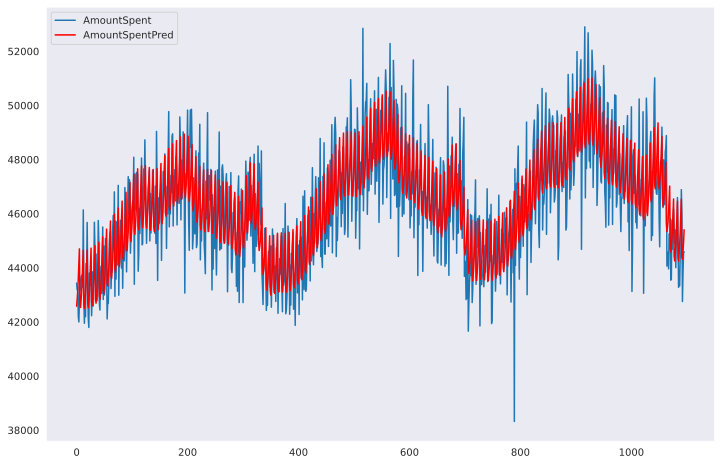

In [ ]:
# Gráfico dos valoes reais e previsões
fig, ax = plt.subplots(figsize=(12,8))
df_final['AmountSpent'].plot(ax=ax, legend=('Amount Spent'))
df_final['AmountSpentPred'].plot(ax=ax, color='r', legend={'Predicted'})
plt.savefig('st_yhat.png')
plt.show()

## ***Conclusão***
________________________________________________________________________________

Entendemos a importância da previsão de demanda para um negócio e como *Time Series* se diferencia das aplicações comuns de machine learning. Apesar dos esforços em tornar nosso conjunto de dados em estacionário para melhores previsões, o que prevaleceu foi apenas a aplicação da função logaritmica para redução da dimensionalidade, devolvendo-nos valores mais condizentes. Conceitos de *Feature Engineering* também foram aplicados, bem como o framework Prophet, desenvolvido pelo Facebook, para *Forecasting*.

Com essas ferramentas e conceitos, conseguiu-se realizar a previsão de vendas em 30 dias, possibilitando a organização da empresa com relação ao seu negócio.